In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras import backend as K


In [13]:
brain_data ='/content/drive/MyDrive/Thinkful Data Science/Capstone IV: Final Project/Brain Tumor Data Set'

img_width, img_height = 150, 150
batch_size=80

In [14]:
train_datagen = ImageDataGenerator(
    rescale=1./ 255, 
    shear_range=0.3,
    zoom_range=0.1, 
    horizontal_flip=True, validation_split=0.20
)

In [15]:
train_generator = train_datagen.flow_from_directory(
    brain_data, 
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary', 
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    brain_data, 
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 3689 images belonging to 2 classes.
Found 921 images belonging to 2 classes.


In [16]:
classes = validation_generator.class_indices
classes

{'Brain Tumor': 0, 'Healthy': 1}

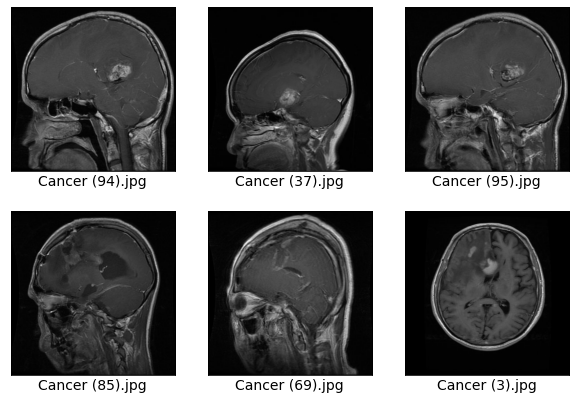

In [17]:
import random 
import matplotlib.image as mpimg
tumor = '/content/drive/MyDrive/Thinkful Data Science/Capstone IV: Final Project/Brain Tumor Data Set/Brain Tumor/'

fig = plt.figure(figsize=[10, 10])
fig.patch.set_facecolor('white')
for i in range(1, 7):
    plt.subplot(2, 3, i)
    rand_pick = random.randint(1, 100)
    random_img = str(rand_pick)
    img = mpimg.imread(tumor + 'Cancer (' + random_img + ').jpg')
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('Cancer (' + str(random_img) + ').jpg', fontsize=14)
fig.subplots_adjust(hspace=-0.4)
plt.show()

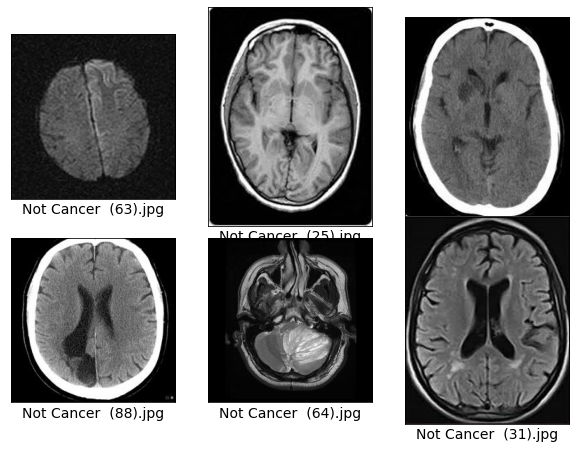

In [18]:
healthy = '/content/drive/MyDrive/Thinkful Data Science/Capstone IV: Final Project/Brain Tumor Data Set/Healthy/'

fig = plt.figure(figsize=[10, 10])
fig.patch.set_facecolor('white')
for i in range(1, 7):
    plt.subplot(2, 3, i)
    rand_pick = random.randint(1, 100)
    random_img = str(rand_pick)
    img = mpimg.imread(healthy + 'Not Cancer  (' + random_img + ').jpg')
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('Not Cancer  (' + str(random_img) + ').jpg', fontsize=14)
fig.subplots_adjust(hspace=-0.4)
plt.show()

In [19]:
input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [20]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      1792      
                                                                 
 activation_3 (Activation)   (None, 150, 150, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 360000)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                23040064  
                                                                 
 activation_4 (Activation)   (None, 64)                0         
                                                      

In [ ]:
model.fit_generator(
    train_generator,
    verbose=1,
    steps_per_epoch=25,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=10
    )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/20
25/25 [==============================] - 83s 3s/step - loss: 3.3364 - accuracy: 0.5428 - val_loss: 0.7833 - val_accuracy: 0.5612
Epoch 2/20
25/25 [==============================] - 71s 3s/step - loss: 0.6808 - accuracy: 0.6081 - val_loss: 0.5512 - val_accuracy: 0.7138
Epoch 3/20
25/25 [==============================] - 73s 3s/step - loss: 0.5946 - accuracy: 0.7130 - val_loss: 0.5755 - val_accuracy: 0.7088
Epoch 4/20
25/25 [==============================] - 76s 3s/step - loss: 0.5175 - accuracy: 0.7635 - val_loss: 0.4932 - val_accuracy: 0.7538
Epoch 5/20
25/25 [==============================] - 74s 3s/step - loss: 0.4880 - accuracy: 0.7755 - val_loss: 0.5618 - val_accuracy: 0.7350
Epoch 6/20
25/25 [==============================] - 72s 3s/step - loss: 0.4549 - accuracy: 0.8040 - val_loss: 0.5105 - val_accuracy: 0.7700
Epoch 7/20
25/25 [==============================] - 74s 3s/step - loss: 0.4246 - accuracy: 0.8080 - val_loss: 0.4145 - val_accuracy: 0.8350
Epoch 8/20
25/25 [==

CNN model with 1 convolutional layer and 2 dense layers with rsmprop optimizer had an accuracy score of 92% (validation accuracy of 92%)

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 activation_6 (Activation)   (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 activation_7 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                  

In [ ]:
model.fit_generator(
    train_generator,
    steps_per_epoch=25,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
25/25 [==============================] - 108s 4s/step - loss: 1.1885 - accuracy: 0.5723 - val_loss: 0.5848 - val_accuracy: 0.7175
Epoch 2/20
25/25 [==============================] - 107s 4s/step - loss: 0.6136 - accuracy: 0.6670 - val_loss: 0.5329 - val_accuracy: 0.7425
Epoch 3/20
25/25 [==============================] - 109s 4s/step - loss: 0.5688 - accuracy: 0.7180 - val_loss: 0.5390 - val_accuracy: 0.7700
Epoch 4/20
25/25 [==============================] - 105s 4s/step - loss: 0.5387 - accuracy: 0.7398 - val_loss: 0.4665 - val_accuracy: 0.7775
Epoch 5/20
25/25 [==============================] - 106s 4s/step - loss: 0.4787 - accuracy: 0.7745 - val_loss: 0.4721 - val_accuracy: 0.7900
Epoch 6/20
25/25 [==============================] - 101s 4s/step - loss: 0.4661 - accuracy: 0.7875 - val_loss: 0.4556 - val_accuracy: 0.7987
Epoch 7/20
25/25 [==============================] - 107s 4s/step - loss: 0.3822 - accuracy: 0.8357 - val_loss: 0.4286 - val_accuracy: 0.8150
Epoch 8/20
25

CNN model with 2 convolutional layers and 2 dense layers with rsmprop optimize had an accuracy score of 93% (validation accuracy of 92%)

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit_generator(
    train_generator,
    steps_per_epoch=25,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=10)

CNN model with 2 convolutional layers and 3 dense layers with rsmprop optimizer had a 93% accuracy (validation accuracy of 96%)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=10)

Same CNN model with 2 convolutional layers and 3 dense layers with adam optimizer had a 99% accuracy (validation accuracy of 97%)

In [ ]:
val_score = model.evaluate(validation_generator)

print(f'val_loss: {val_score[0]}')
print(f'val_accuracy: {val_score[1]}')


# score = model.evaluate(train_generator)

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [ ]:
predictions = model.predict(validation_generator)
preds = predictions.flatten()

preds_labels = (preds>0.5).astype(int)

# predictions = model.predict(train_generator)
# preds = predictions.flatten()

# preds_labels = (preds>0.5).astype(int)

In [ ]:
labels = validation_generator.classes

# labels = train_generator.classes


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

accuracy = accuracy_score(labels, preds_labels)
print(f'accuracy score: {accuracy}')

precision = precision_score(labels, preds_labels)
print(f'precision score: {precision}')

recall = recall_score(labels, preds_labels)
print(f'recall score: {recall}')

auc = roc_auc_score(labels, preds_labels)
print(f'auc score: {auc}')

# accuracy = accuracy_score(labels, preds_labels)
# print(accuracy)

# precision = precision_score(labels, preds_labels)
# print(precision)

# recall = recall_score(labels, preds_labels)
# print(recall)

# auc = roc_auc_score(labels, preds_labels)
# print(auc)